## Movie Data Analysis

#### Objective:
Conduct exploratory data analysis on movie data

<a id='toc'></a>
### Table of Contents
* [Matplotlib Website](https://matplotlib.org)
* [Import and Explore Data](#importandexplore)
* [Converting numeric variables to categorical variables](#convert)
* [Visualization](#visualization)
    * [Import visualization libraries](#visuallibraries) 
    * [Jointplots](#jointplots)
    * [Histograms](#histograms)
    * [Stacked Histograms](#stacked)
    * [KDE Plot](#kdeplot)
    * [Subplots()](#subplots)
    * [Violinplots vs. Boxplots](#violin_box)
    * [Facet Grid](#facetgrid)
    * [Coordinates and Diagonals](#coordinates)
    * [Building Dashboards](#dashboards)
    * [Styling Tips](#styling)
    * [Finishing Touches](#styling2)
    * [Section Recap](#recap)

### Import Libraries

In [2]:
import pandas as pd
import os

In [3]:
os.getcwd()

'/Users/wmemorgan/Google Drive/Education/Programming/Python_Programming_A-Z/Section_06_Advanced_Visualization'

---
<a id='importandexplore'></a>

### Import and Explore Data

In [4]:
movies = pd.read_csv('Movie-Ratings.csv')

In [4]:
len(movies)

559

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                         559 non-null object
Genre                        559 non-null object
Rotten Tomatoes Ratings %    559 non-null int64
Audience Ratings %           559 non-null int64
Budget (million $)           559 non-null int64
Year of release              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [8]:
movies.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [5]:
# Rename column names
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', \
                 'BudgetMillions', 'Year']

In [6]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [12]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


---
<a id='convert'></a>

### Convert numeric variables into categorical variables
[Table of Contents](#toc)

In [7]:
# Assign category type to Film, Genre, and Year
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [17]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [18]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

---
<a id='visualization'></a>

## Visualization
[Table of Contents](#toc) | 
[Matplotlib Website](https://matplotlib.org)

<a id='visuallibraries'></a>
### Import visualization libraries

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

---
<a id='jointplots'></a>

### Jointplots
[Table of Contents](#toc) | [Section](#visualization)

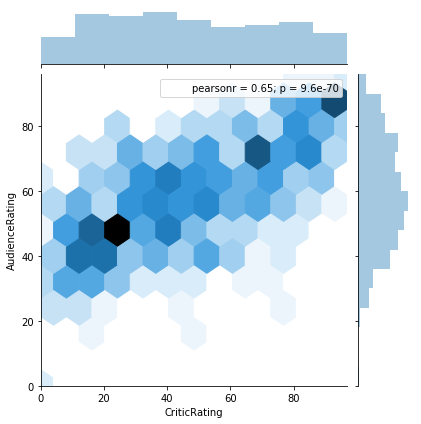

In [9]:
#<<< Chart 1
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

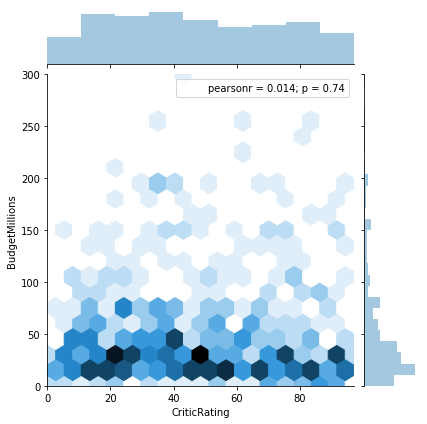

In [10]:
#<<< Chart 2
j = sns.jointplot(data=movies, x='CriticRating', y='BudgetMillions', kind='hex')

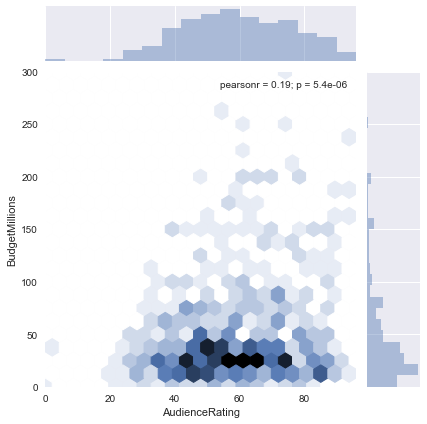

In [28]:
#<<< Chart 2
j = sns.jointplot(data=movies, x='AudienceRating', y='BudgetMillions', kind='hex')

In [12]:
sns.set_style('darkgrid')

---
<a id='histograms'></a>

### Histograms
[Table of Contents](#toc) | [Section](#visualization)

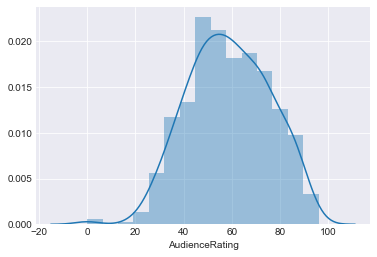

In [13]:
m1 = sns.distplot(movies.AudienceRating, bins=15)

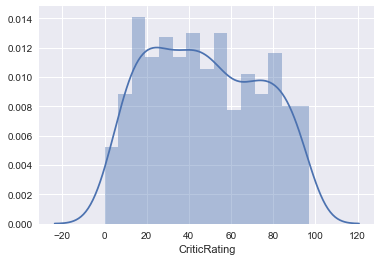

In [30]:
m2 = sns.distplot(movies.CriticRating, bins=15)

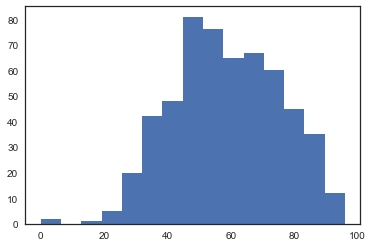

In [32]:
# Pyplot version
sns.set_style('white')
n1 = plt.hist(movies.AudienceRating, bins=15)

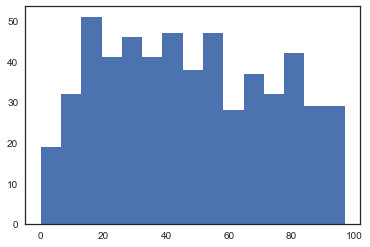

In [33]:
n2 = plt.hist(movies.CriticRating, bins=15)

#### NOTE: Chart Background Formatting
To toggle chart background from grid to white background:

**Display grid**
```python
sns.set_style('darkgrid')
```

**Hide grid**
```python
sns.set_style('white')
```

#### Analysis Notes:
* Audience ratings adopt a normal distribution.
* Critics ratings are evenly distributed.
* Highest ratings (both audience and critics) are for movies with budgets 50 million or less.

---
<a id='stacked'></a>

### Stacked Histograms
[Table of Contents](#toc) | [Section](#visualization)

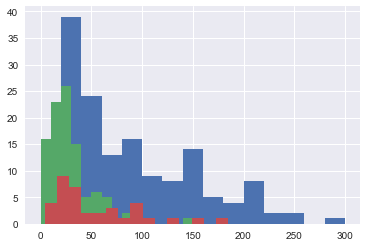

In [49]:
# Displaying histograms from multiple data sources in one chart
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.show()

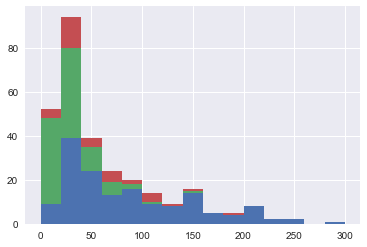

In [53]:
# Stack multiple data sources in one histogram chart (MANUAL METHOD)
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, \
        movies[movies.Genre == 'Drama'].BudgetMillions, \
        movies[movies.Genre == 'Thriller'].BudgetMillions], \
        bins=15, stacked=True)
plt.show()

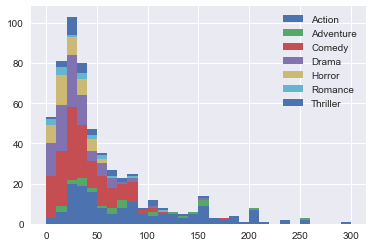

In [97]:
# Stack multiple data sources in one histogram chart (Better Way Version 1)
genres = movies.Genre.cat.categories
datasource = []
data_label = []
for i in genres:
    datasource.append((movies[movies.Genre==i].BudgetMillions))
    data_label.append(i)
    
plt.hist(datasource, bins=30, stacked=True, label=data_label)
plt.legend()
plt.show()

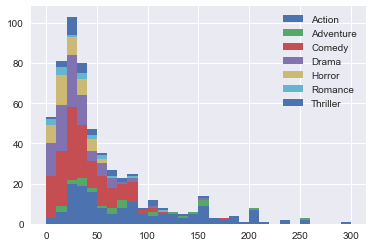

In [98]:
# Stack multiple data sources in one histogram chart (Kirill's Method)
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append((movies[movies.Genre==gen].BudgetMillions))
    mylabels.append(gen)

h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.legend()
plt.show()

---
<a id='kdeplot'></a>

### KDE Plot
[*Kernel Density Estimate*](https://en.wikipedia.org/wiki/Kernel_density_estimation)

[Table of Contents](#toc) | [Section](#visualization)

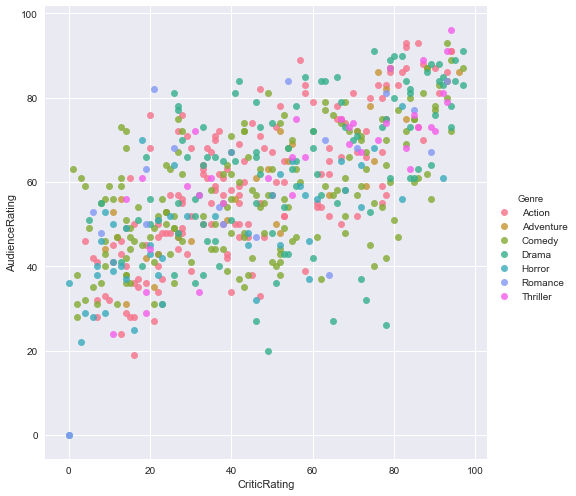

In [101]:
# Scatter Plot Method
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', \
                 fit_reg=False, hue='Genre', \
                 size=7, aspect=1)

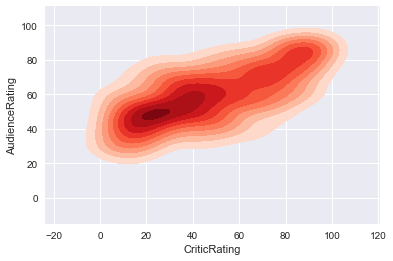

In [108]:
# KDE Plot
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                shade=True, shade_lowest=False, cmap='Reds')

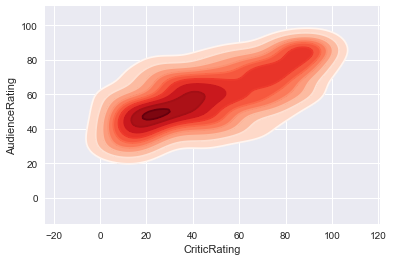

In [110]:
# KDE Plot (Smoother Chart)
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                shade=True, shade_lowest=False, cmap='Reds')
# TIP:
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                cmap='Reds')

---
<a id='subplots'></a>

### Subplots()
[Table of Contents](#toc) | [Section](#visualization)

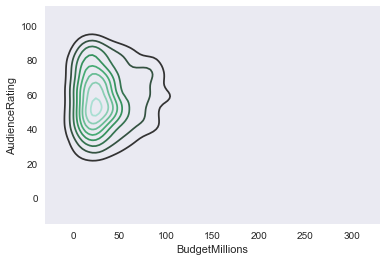

In [121]:
sns.set_style('dark')
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

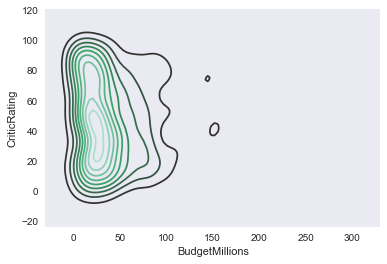

In [120]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

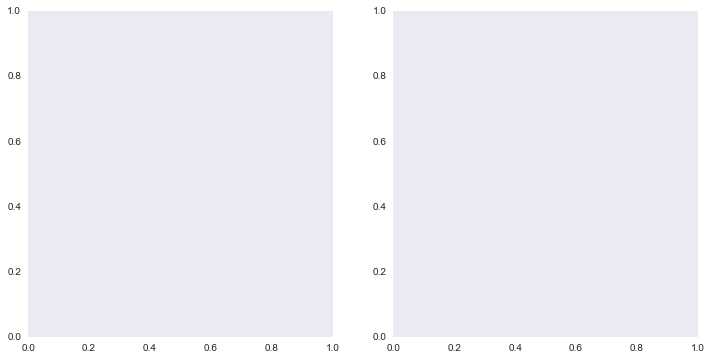

In [124]:
# Subplot Template
f, axes = plt.subplots(1, 2, figsize=(12,6))

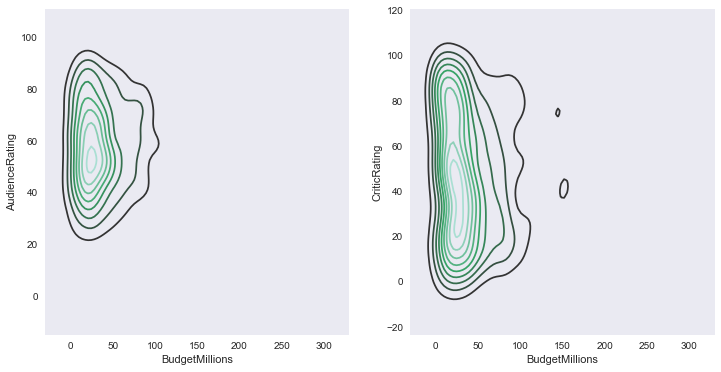

In [125]:
# Subplot Example 1
f, axes = plt.subplots(1, 2, figsize=(12,6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])

In [126]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11622fd68>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x114d8d208>], dtype=object)

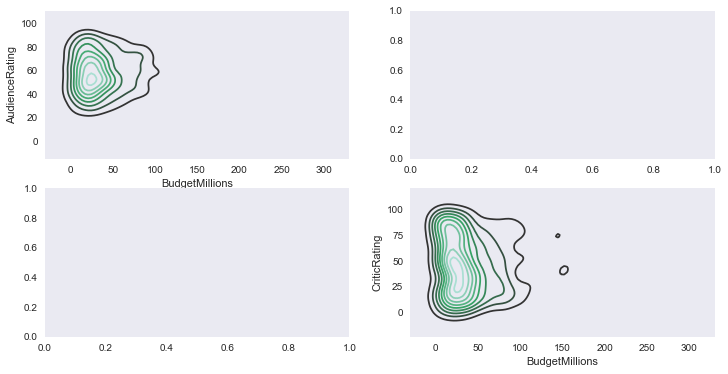

In [132]:
# Subplot Example 2 (Multi-dimensional plot)
f, axes = plt.subplots(2, 2, figsize=(12,6)) #More than one dimension
# Need to specify row and column coordinates in the 'ax' parameter
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1,1])


[(-20, 160)]

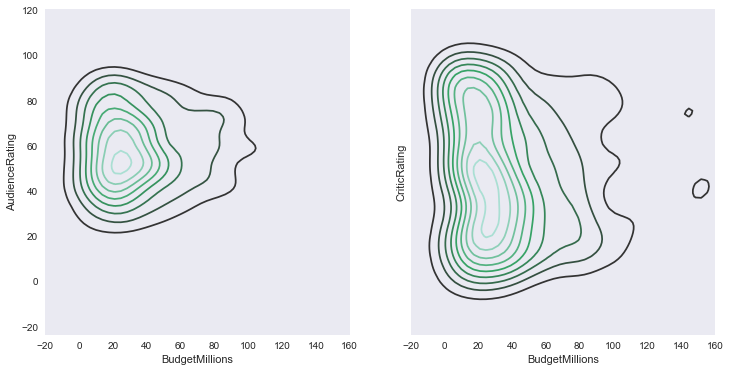

In [136]:
# Subplot Example 3 (Make it prettier)
f, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
# Zoom in on the chart to a specific axis scale
k1.set(xlim=(-20,160))
#k2.set(xlim=(-20,200))

---
<a id='violin_box'></a>

### ViolinPlots vs BoxPlots
[Table of Contents](#toc) | [Section](#visualization)

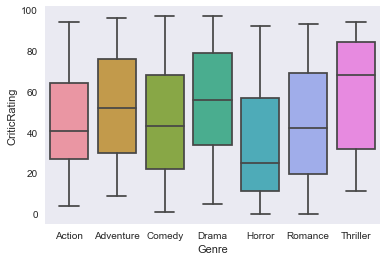

In [140]:
#BoxPlots
w = sns.boxplot(data=movies, x='Genre', y='CriticRating')

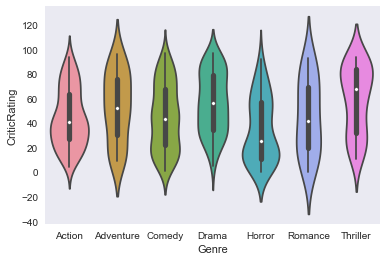

In [139]:
#ViolinPlots
z = sns.violinplot(data=movies, x='Genre', y='CriticRating')

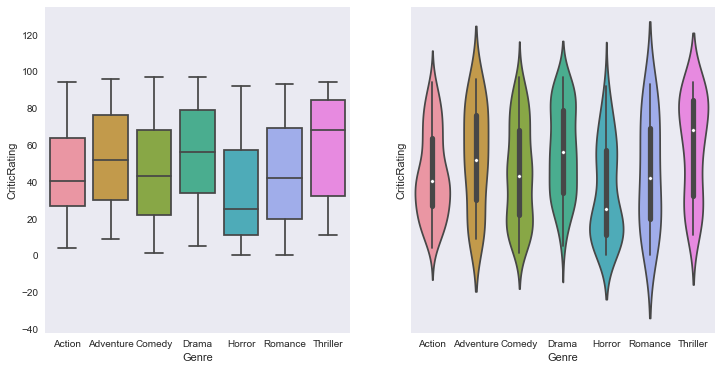

In [142]:
# Side by Side Comparison
f, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
w = sns.boxplot(data=movies, x='Genre', y='CriticRating', ax=axes[0])
z = sns.violinplot(data=movies, x='Genre', y='CriticRating', ax=axes[1])

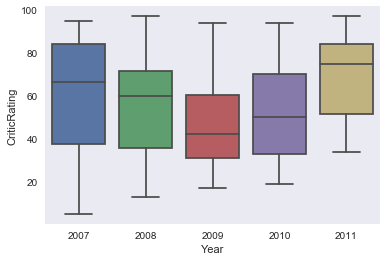

In [143]:
# Drill down to a specific genre
# BoxPlot
u = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating')

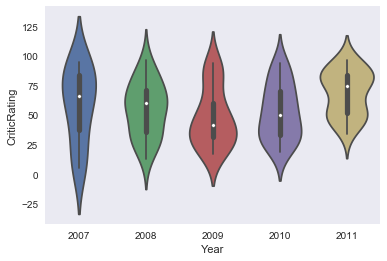

In [144]:
# ViolinPlot
v = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating')

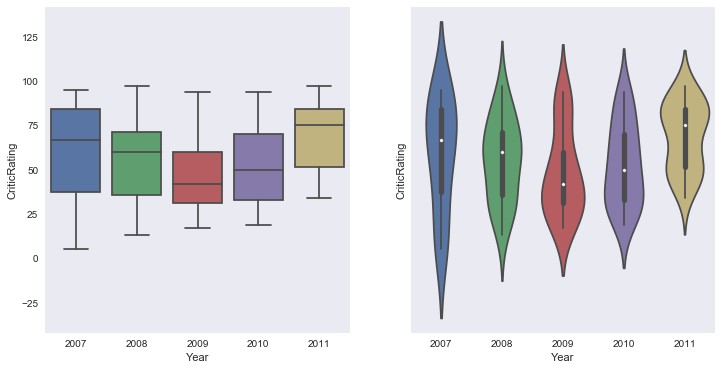

In [145]:
# Side by Side Comparison
f, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
u = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=axes[0])
v = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=axes[1])

### Analysis
* ViolinPlots can sometimes provide a more visually intuitive way to identify concentration of observations
* BoxPlots are preferred by executives because of the quartile displays
* **NOTE: In a boxplot the shorter the quartile the denser the concentration of data points in that quartile**

---
<a id='facetgrid'></a>

### Facet Grid
[Table of Contents](#toc) | [Section](#visualization)

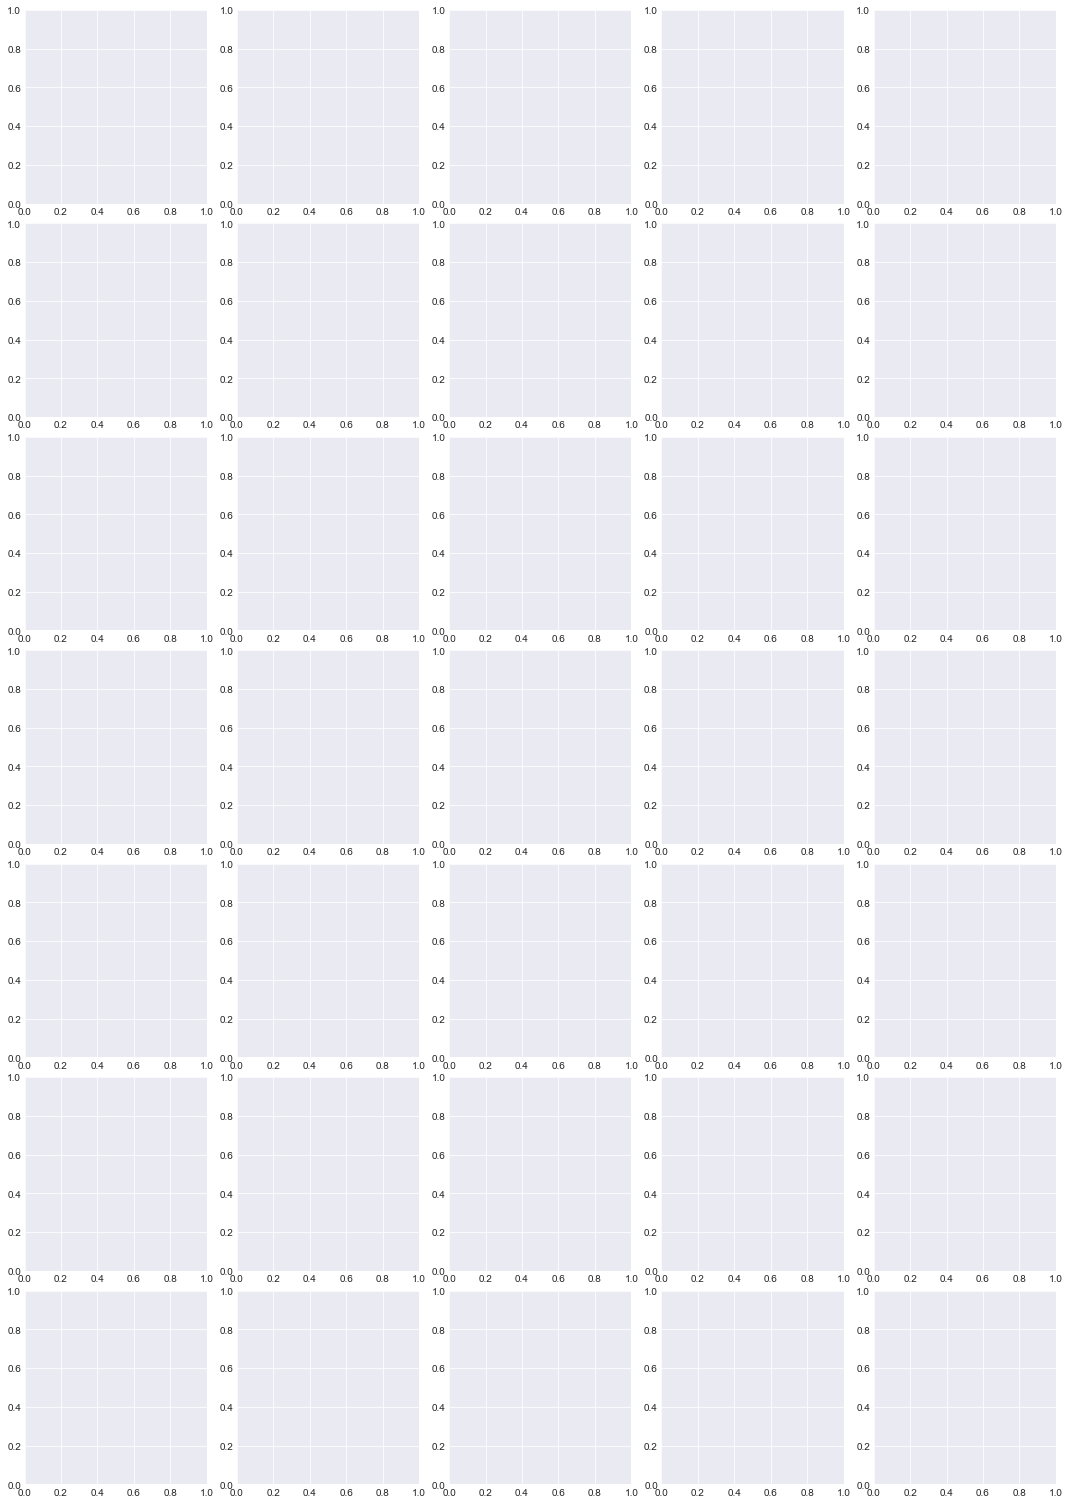

In [15]:
#g = sns.FacetGrid(movies, row='Genre', hue='Genre')
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')

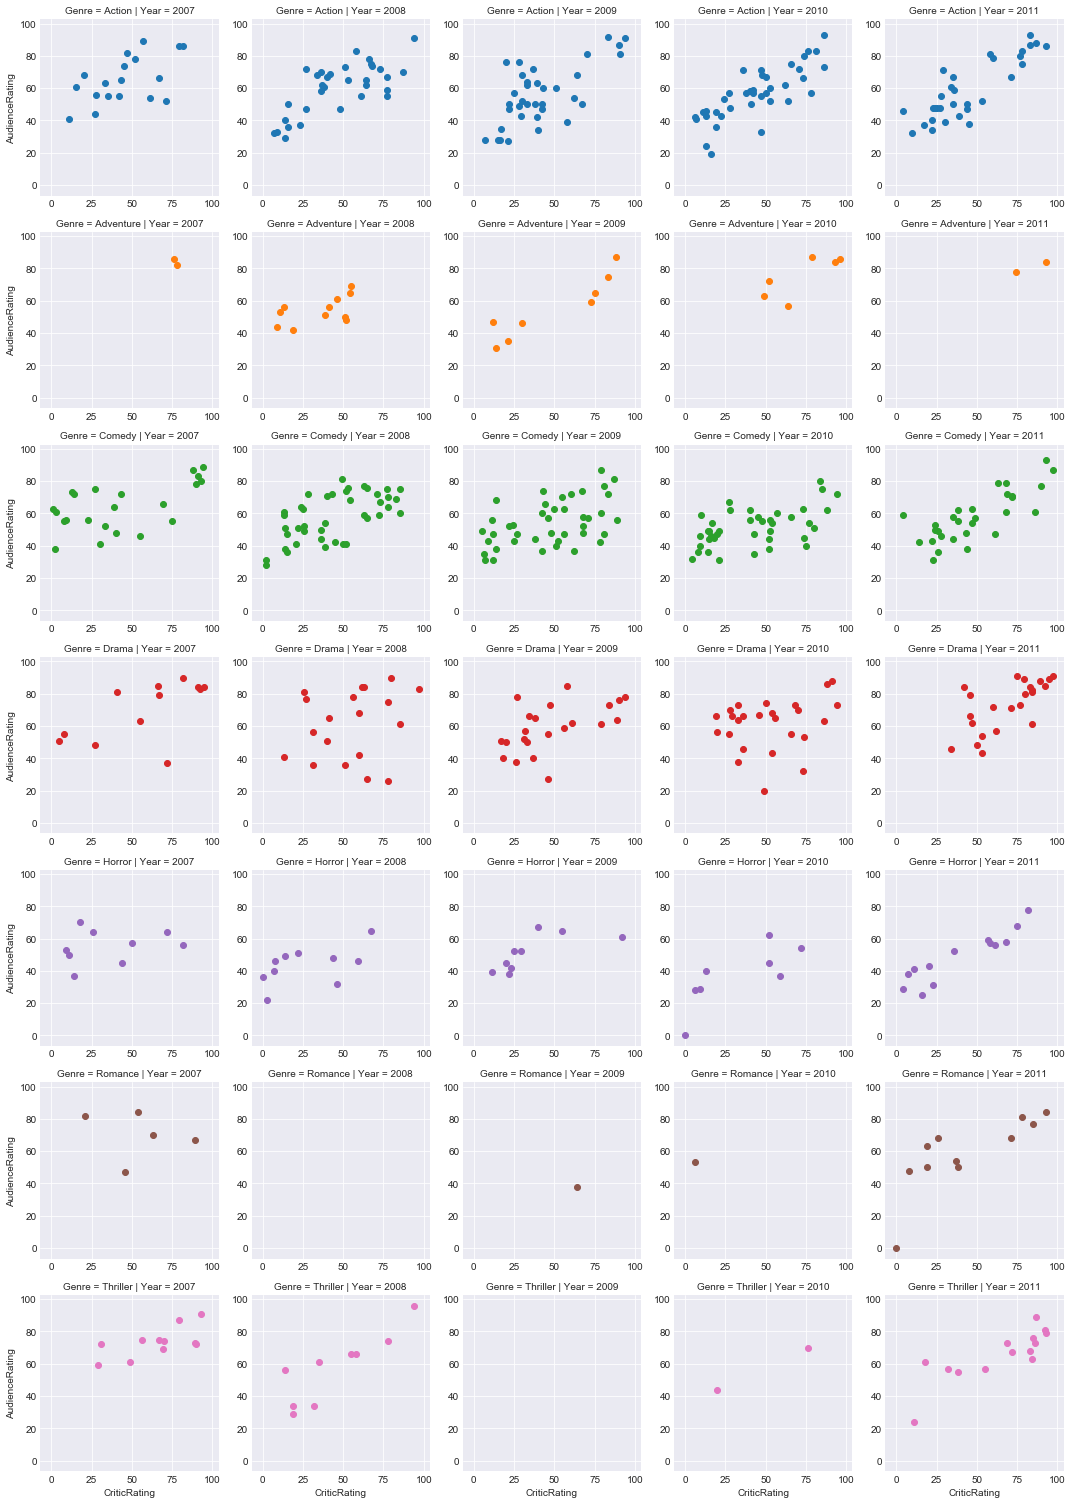

In [17]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

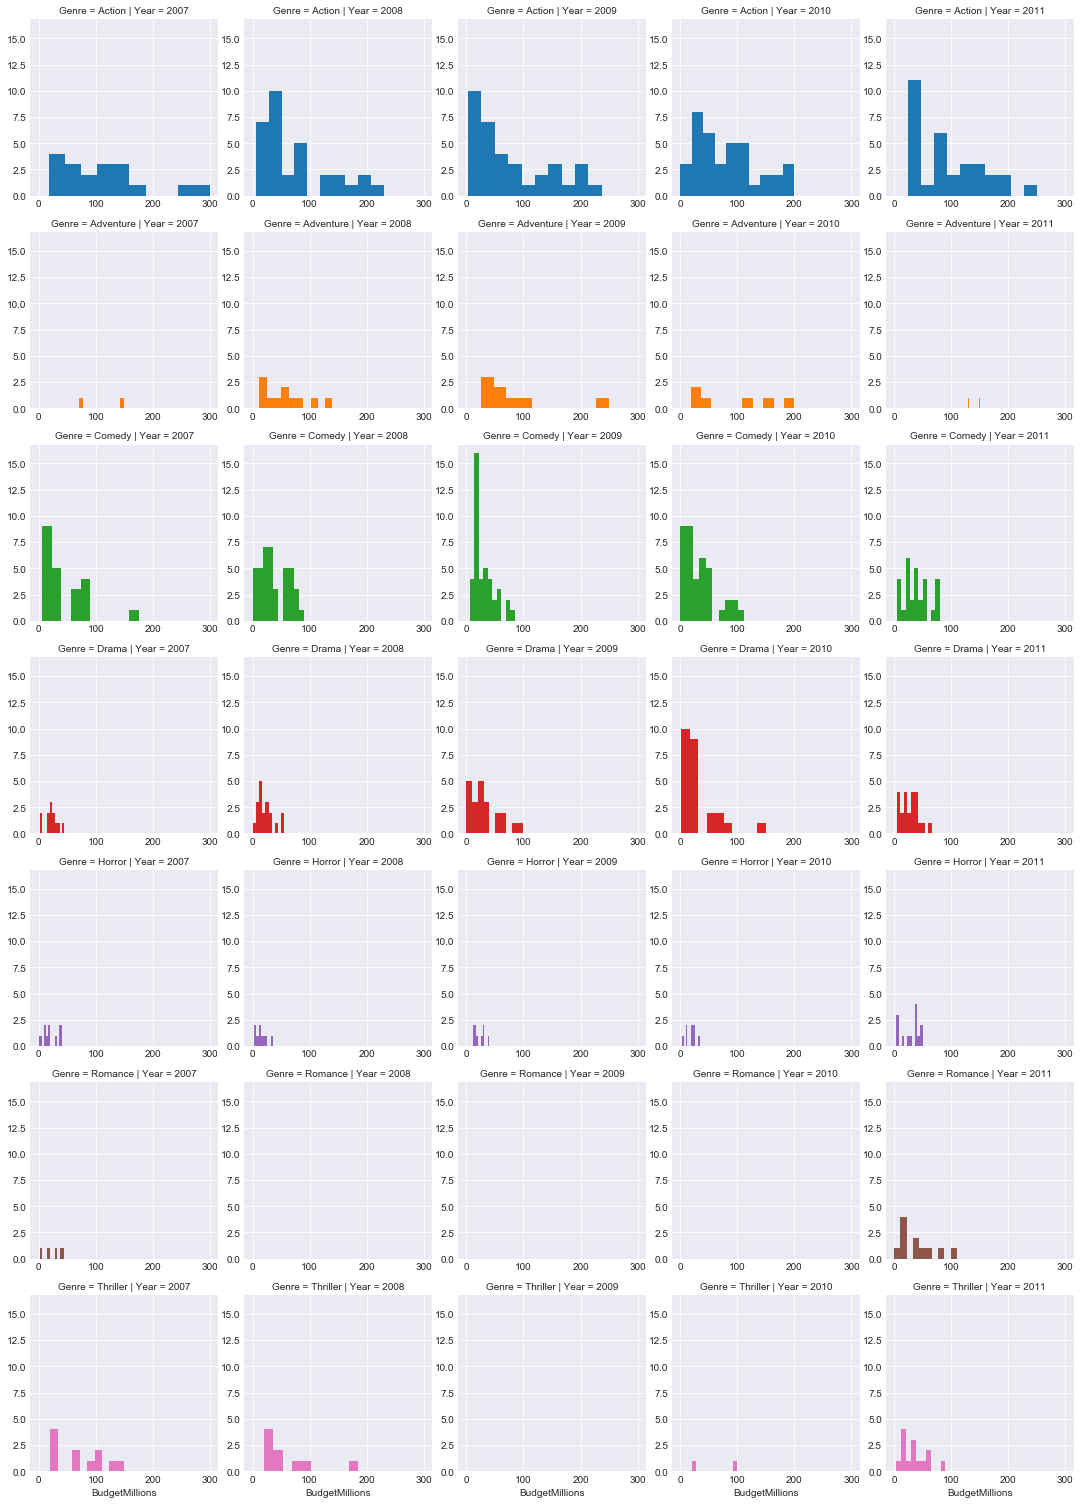

In [22]:
#Can populate with any type of chart
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

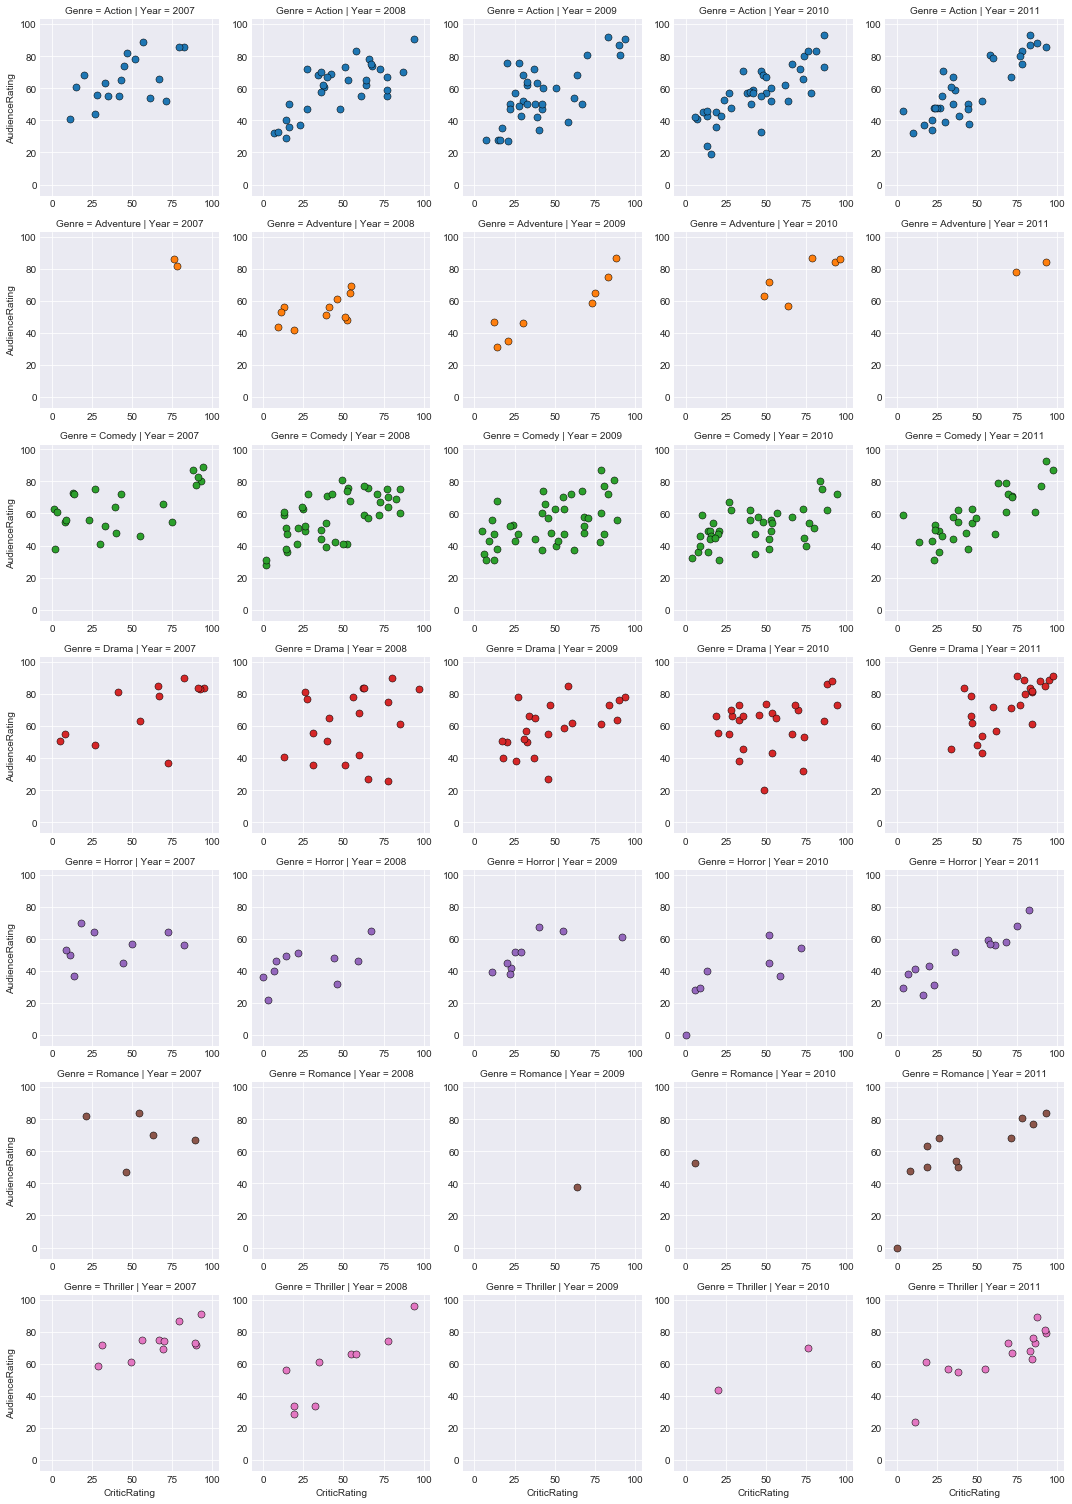

In [19]:
# More scatter plot examples
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

---
<a id='coordinates'></a>

### Coordinates and Diagonals
[Table of Contents](#toc) | [Section](#visualization)

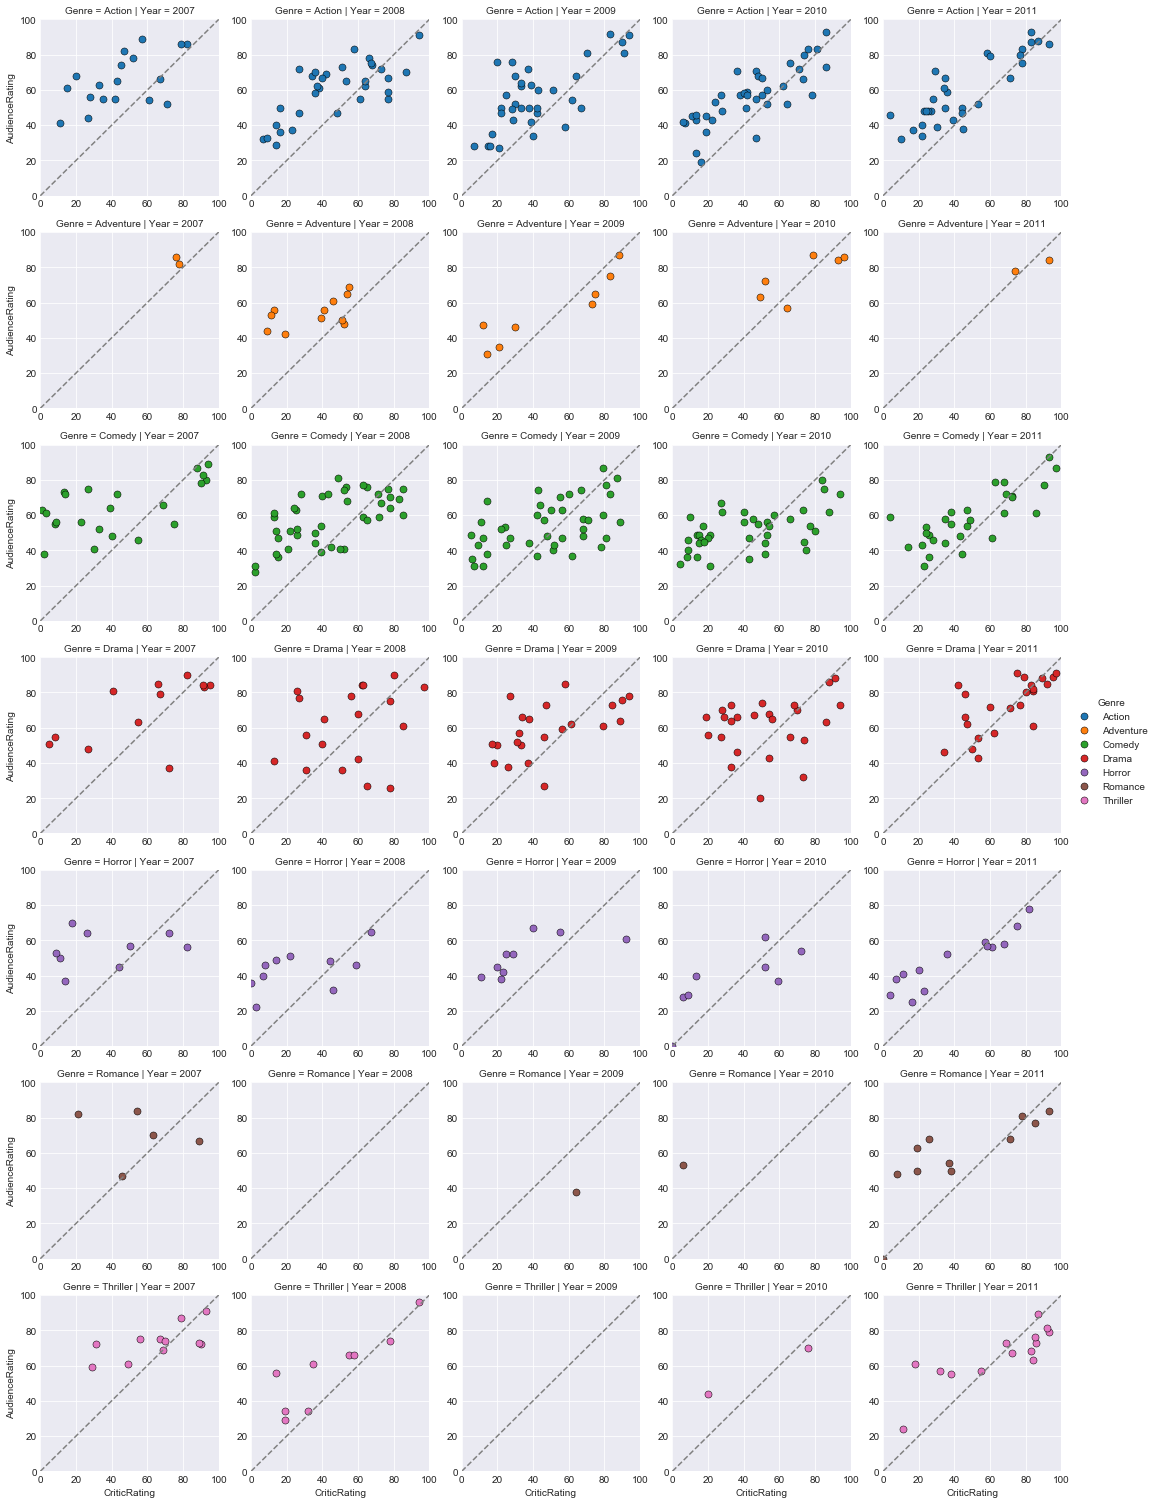

In [26]:
# Controlling Axes and Adding Diagonals
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100),ylim=(0,100)) #Not necessary in newer versions of Jupyter notebooks
for ax in g.axes.flat:
    ax.plot((0, 100), (0, 100), c='gray', ls='--')
g.add_legend()


---
<a id='dashboards'></a>

### Building Dashboards
[Table of Contents](#toc) | [Section](#visualization)

In [27]:
#Import Libraries
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

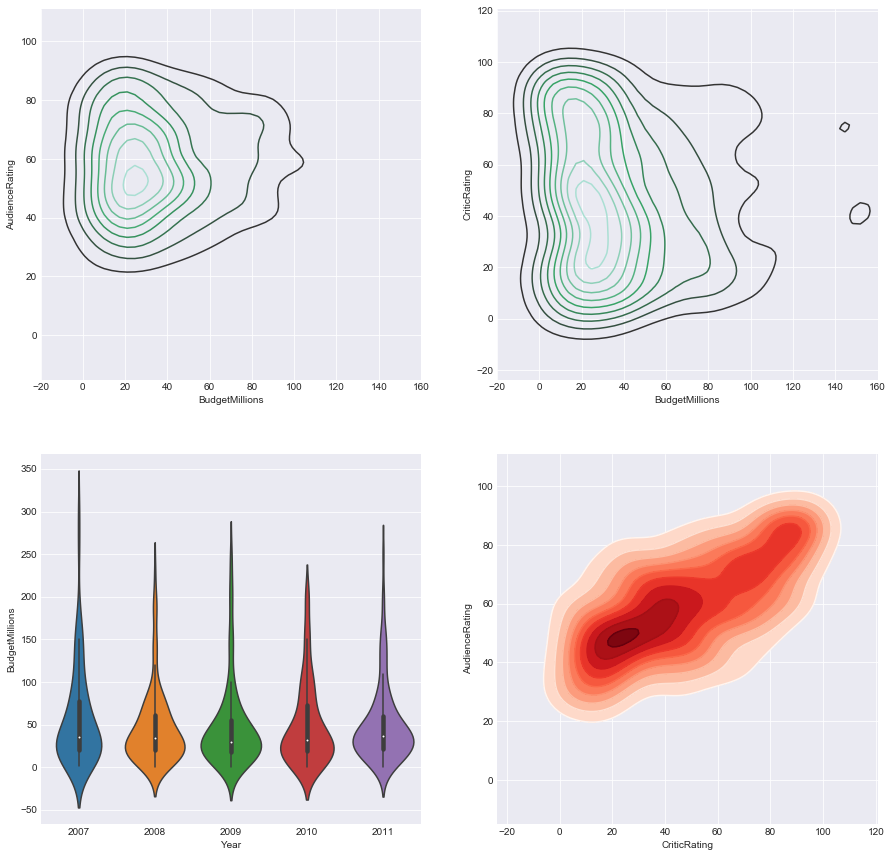

In [57]:
# Dashboard Example 1
sns.set_style('darkgrid')
f, axes = plt.subplots(2, 2, figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])
k3 = sns.violinplot(data=movies, x='Year', y='BudgetMillions', ax=axes[1,0])

#NOTE: a different charting approach for non-Seaborn (pyplot) charts 
#replace 'plt' prefix/object with chart location 'axes[x,y]
"""
Since the subplots() function is built in pyplot regular pyplot charts can be generated
with the 'plt' prefix and chart location is assigned with the 'axes[row,col].' coordinates
"""
#axes[1,1].hist(movies.CriticRating, bins=15) 

k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade=True, shade_lowest=False, cmap='Reds', \
                 ax=axes[1,1])
# TIP:
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                  cmap='Reds', ax=axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

---
<a id='styling'></a>

### Styling Tips
[Table of Contents](#toc) | [Section](#visualization)

In [43]:
#Import Libraries
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

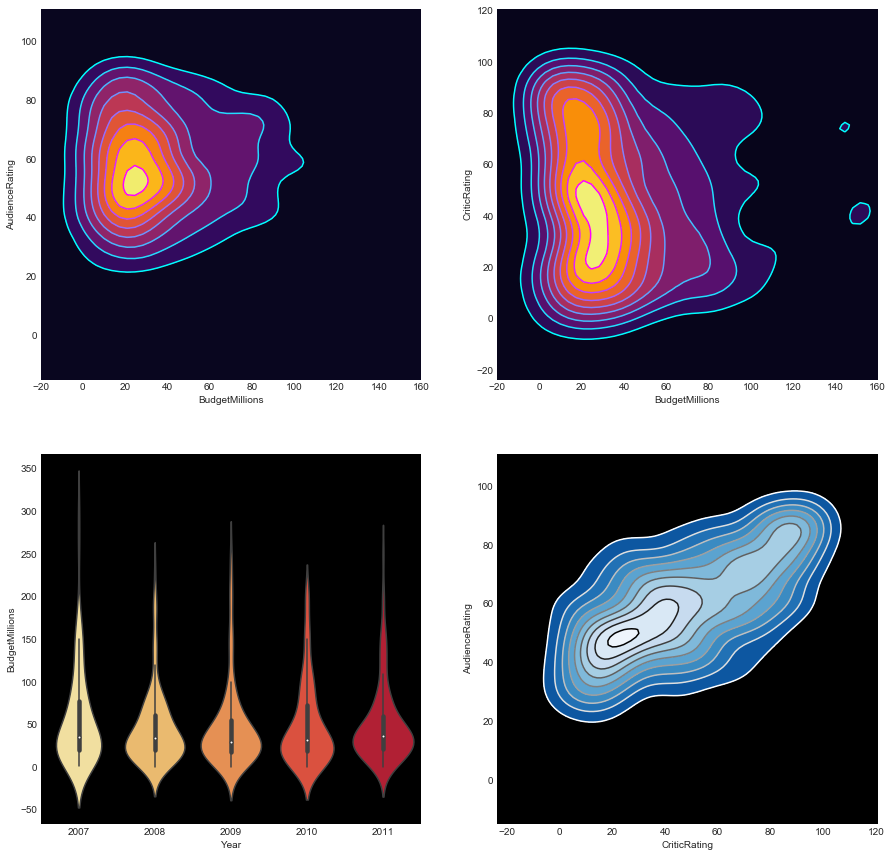

In [61]:
# Styling a dashboard
#Set background to black without a grid
sns.set_style('dark', {'axes.facecolor':'black'}) #white, whitegrid, dark, darkgrid, ticks
f, axes = plt.subplots(2, 2, figsize=(15,15))
#Plot [0,0]
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                 shade=True, shade_lowest=True, cmap='inferno', \
                 ax=axes[0,0])
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                  cmap='cool', ax=axes[0,0])
#Plot [0,1]
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
                 shade=True, shade_lowest=True, cmap='inferno', \
                 ax=axes[0,1])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
                 cmap='cool', ax=axes[0,1])

#Plot [1,0]
k3 = sns.violinplot(data=movies, x='Year', y='BudgetMillions', ax=axes[1,0], \
                    palette='YlOrRd')
#Plot [1,1]
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade=True, shade_lowest=False, cmap='Blues_r', \
                 ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                  cmap='gist_gray_r', ax=axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

---
<a id='styling2'></a>

### More Styling Tips
[Table of Contents](#toc) | [Section](#visualization)

#### Thematic Edits
* Change background to 'whitegrid'
* Add a chart into a plt.subplot() frame to change chart size
* Include a chart title, and specify font size, color, and style
* Add labels to x and y axes
* Change the size of the chart ticks
* Improve the legend appearance: change fontsize, backgroundcolor 
* OPTION: can specify actual color of the data


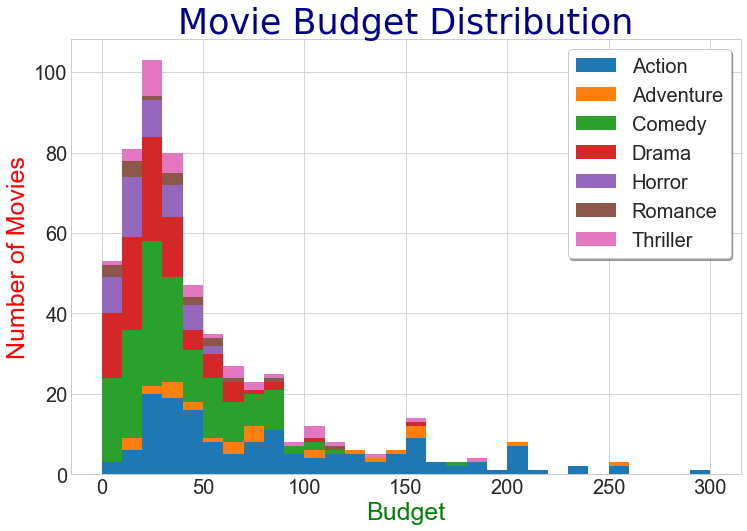

In [85]:
#Thematic Edits
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append((movies[movies.Genre==gen].BudgetMillions))
    mylabels.append(gen)

sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels, )
plt.title('Movie Budget Distribution', fontsize=35, color='DarkBlue', fontname='Console')
plt.ylabel('Number of Movies', fontsize=25, color='Red')
plt.xlabel('Budget', fontsize=25, color='Green')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(frameon=True, fancybox=True, shadow=True, \
           framealpha=1, prop={'size':20})
plt.show()

---
<a id='recap'></a>

### Section Recap
[Table of Contents](#toc) | [Section](#visualization)

**In this section we learned:**
1. [Category data type in Python](#convert)
2. [Jointplots](#jointplots)
3. [Histograms](#histograms)
4. [Stacked Histograms](#stacked)
5. [KDE Plot](#kdeplot)
6. [Using the Subplots() function](#subplots)
7. [Violinplots vs. Boxplots](#violin_box)
8. [Creating a Facet Grid](#facetgrid)
9. [Coordinates and Diagonals](#coordinates)
10. [Building Dashboards](#dashboards)
11. [Styling Tips](#styling)
12. [Finishing Touches](#styling2)